# Suite SDK Usage

## Initialization

### - Initialize Suite SDK

In [1]:
!printf "pingu\n69dba75b641ccde433e0512496f72b28\n" | spb configure

import sdk

print(sdk.__version__)

Suite Account Name: Access Key: Profile default is counfigured with account name 'pingu'.
0.0.34


### - Initialize a client to access your project

In [2]:
client = sdk.Client(project_name='SDK OD Test')

print('Project Name: {}'.format(client.get_project_name()))
print('Total number of data: {}'.format(client.get_num_data()))

Project Name: SDK OD Test
Total number of data: 437


## How to Access Images from the Suite

### - Get a data row on Suite

In [3]:
# Get 0-th data in the project
data = client.get_data(0)

print('Key: {}'.format(data.get_key()))
print('Dataset: {}'.format(data.get_dataset_name()))
print('Image URL: {}'.format(data.get_image_url()))
print('Status: {}'.format(data.get_status()))

Key: train_SDK_OD_Test_bugatti_5.jpg
Dataset: train_SDK_OD_Test
Image URL: https://suite-asset.superb-ai.com/tenants/pingu/assets/865f0bf1-dc2d-4641-8c48-c713aa985e9d/image.jpg?Expires=1594181649&Signature=Z8Y-5eNCQFCTZyweirouSVu1cPIognDGum8TKSVaUnLTXvRnOU6SJ2V0fHzcuIiU7jhXZ0M~OUElTbjszLJHauPVYQWvGF0R5epSXTygToLX7P4V5uF04c1XbYv~QCpv9CJOY1EbiwyOEKTFciDvuWMiiXVIvOv-WjYuYEO9sWvsmG8H1UUX3~ERJ23mWQoYGZGRT4EVy5bPurMDcJZ-TdlIoIS2F4r-TiDVownp6k4nAj9Ey37RCo~G1Esg39dr9MXiaTBI88OSM4ACV9umK2ek0-xe3~647MHmbIdX5ouJt39dAhwSkiCkab3WJuLE2vDZQUThtFlpnls2T9QkMQ__&Key-Pair-Id=APKAI23CZB2SCQMZ57IA
Status: WORKING


### - Read the corresponding image

Image type: <class 'numpy.ndarray'>
Image dtype: uint8
Image shape: (529, 1024, 3)


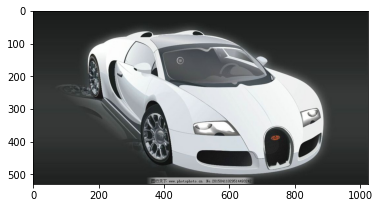

In [4]:
image = data.get_numpy_image()

print('Image type: {}'.format(image.__class__))
print('Image dtype: {}'.format(image.dtype))
print('Image shape: {}'.format(image.shape))

import matplotlib.pyplot as plt
plt.imshow(image)

### - Download the image

In [5]:
download_path, result = data.download_image(download_to='./test.jpg')

print(result)

Content-Type: application/x-www-form-urlencoded
Content-Length: 51002
Connection: close
Date: Wed, 08 Jul 2020 02:19:25 GMT
Last-Modified: Sun, 05 Jul 2020 15:37:00 GMT
ETag: "67ed074e92a2ecf6dfeae1a68307ee7c"
x-amz-version-id: fnYNu7W.STDwPkE7g6oxqd1TekRi59uV
Accept-Ranges: bytes
Server: AmazonS3
X-Cache: Hit from cloudfront
Via: 1.1 66d834c19a50f43e054dd89b259687ca.cloudfront.net (CloudFront)
X-Amz-Cf-Pop: ICN54
X-Amz-Cf-Id: kkEEFF3p7xBi9Nx6rVaqM83uMtNZPIgndG8YELdNUVgfQ4GYAKCa9Q==
Age: 3297




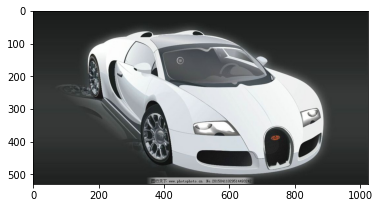

In [6]:
import PIL.Image
image = PIL.Image.open(download_path)
plt.imshow(image)

## How to Manage Labels on the Suite

### - Get labels of the data

In [7]:
category_labels = data.get_category_labels()
object_labels = data.get_object_labels()

print('category_labels', category_labels)
print('object_labels', object_labels)

category_labels ['bugatti']
object_labels [{'id': 1, 'class': 'bugatti', 'shape': {'box': {'x': 83, 'y': 52, 'width': 819, 'height': 457}}, 'properties': []}]


### - Change the label at local

In [8]:
category_labels = ['teslaroadster']
object_labels[0]['class'] = 'teslaroadster'

print('category_labels', category_labels)
print('object_labels', object_labels)

category_labels ['teslaroadster']
object_labels [{'id': 1, 'class': 'teslaroadster', 'shape': {'box': {'x': 83, 'y': 52, 'width': 819, 'height': 457}}, 'properties': []}]


### - Apply the change to the Suite

In [9]:
# The change can be seen at the Suite Web UI
data.set_category_labels(category_labels)
data.set_object_labels(object_labels)

### - Verify the result

In [10]:
data = client.get_data(1)

category_labels = data.get_category_labels()
object_labels = data.get_object_labels()

print('category_labels', category_labels)
print('object_labels', object_labels)

category_labels ['bugatti']
object_labels [{'id': 1, 'class': 'bugatti', 'shape': {'box': {'x': 211, 'y': 117, 'width': 810, 'height': 515}}, 'properties': []}]


In [11]:
# Revert changes

category_labels = ['bugatti']
object_labels[0]['class'] = 'bugatti'

data.set_category_labels(category_labels)
data.set_object_labels(object_labels)